<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/ESAA0905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **개념 정리**

#### 선형 회귀 모델은 보통 모델의 가중치를 제한함으로써 규제를 한다. 그 예로 '릿지'회귀, '라쏘'회귀, 엘라스틱넷이 있다.

#### **1. 릿지 회귀**
#### 릿지 회귀(티호노프 규제)는 규제가 추가된 선형 회귀로 규제항이 비용 함수에 추가됨.
#### 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 적게 유지되도록 노력.
#### 규제항은 훈련하는 동안에만 비용 함수에 추가됨.
#### 모델 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가.
#### 하이퍼 파라미터 알파는 모델을 얼마나 많이 규제할지 조절.
#### 알파=0 이면 릿지 회귀는 선형 회귀와 같아짐.
#### 알파가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

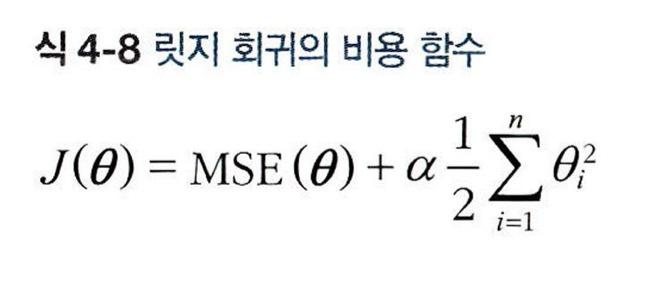

#### **2. 라쏘 회귀**
#### 릿지 회귀처럼 비용 함수의 규제항을 더하지만 비용 함수에 차이가 있음.

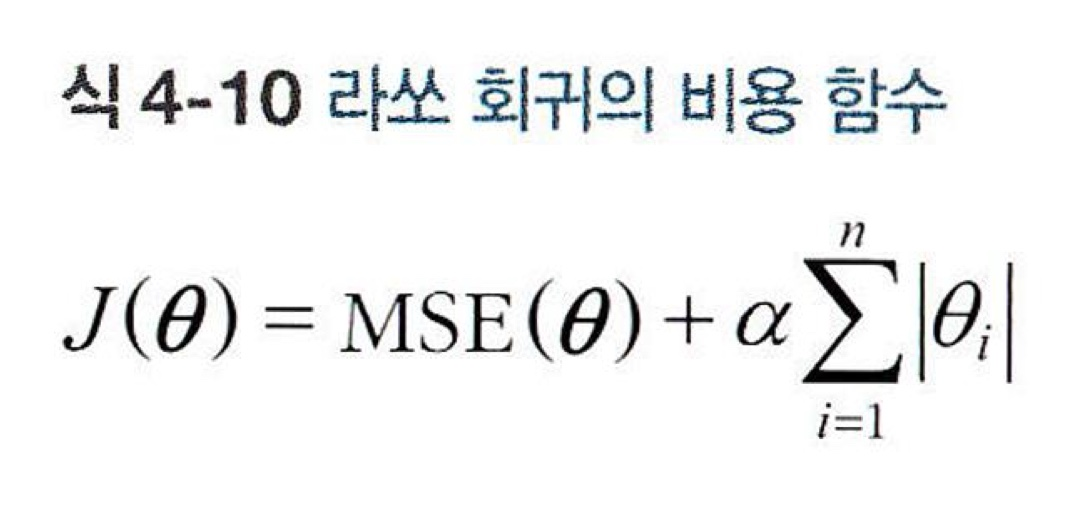

#### 라쏘 회귀는 덜 중요한 특성의 가중치를 제거함. (가중치가 0)
#### 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만듦. (0이 아닌 특성의 가중치가 적음)
#### 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함.
#### 여전히 최적점 근처에서 진동하겠지만 스텝이 갈수록 작아지므로 수렴하게 될 것.

#### **3. 엘라스틱넷**
#### 릿지 회귀와 라쏘 회귀를 절충한 모델.
#### 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하여 혼합 정도는 혼합 비율 r을 사용해 조절.
#### r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음.

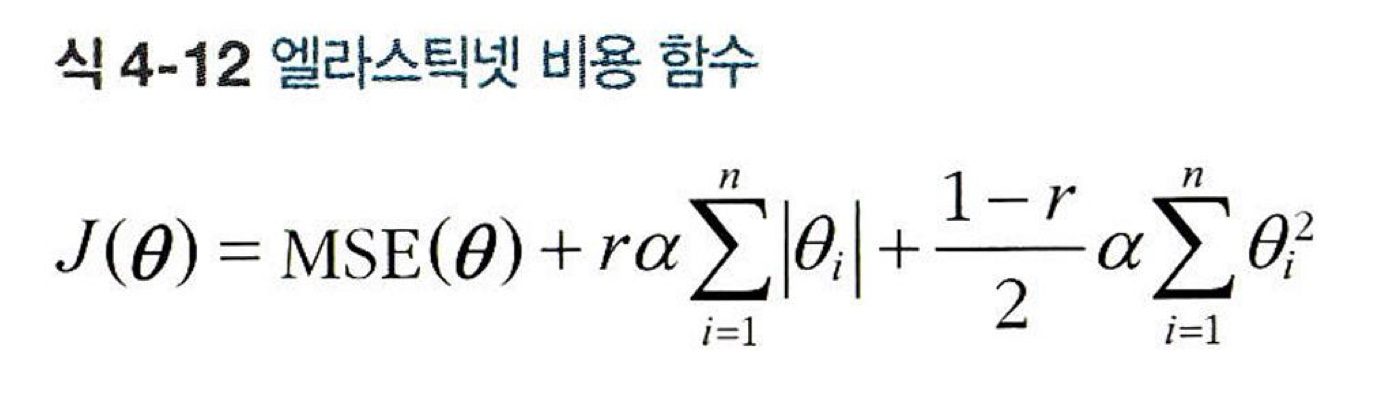

#### **보통의 선형 회귀(규제x), 릿지, 라쏘, 엘라스틱넷을 언제 사용하는가?
#### 규제가 약간은 있는 것이 대부분 좋으므로 평범한 선형 회귀는 피해야 함.
#### 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음. (불필요한 특성의 가중치를 0으로 만들어 줌)
#### 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호함.

### **코드 필사**

In [ ]:
import numpy as np
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.12445563])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.08427851])

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.08481168])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.08326662])

In [ ]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:,3:] # 꽃잎의 너비
y = (iris["target"]==2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

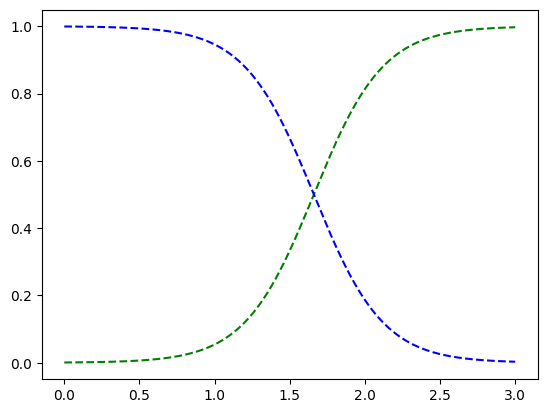

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g--',label="Iris virginica")
plt.plot(X_new, y_proba[:,0],'b--',label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다.

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [ ]:
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver='lbfgs',C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])